#**LOAD BTC DATASET**

In [1498]:
#from google.colab import files
#uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1499]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('/content/BTC-USD.csv', index_col = 0, parse_dates = True, na_values = 0).dropna()

from datetime import timedelta

data =  data.loc['2017-06-16':]

data = data[:-120] # To cut the data and try earlier test timeframes


In [1500]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-16,2469.570068,2539.919922,2385.149902,2518.560059,2518.560059,1.195190e+09
2017-06-17,2514.010010,2685.189941,2484.959961,2655.879883,2655.879883,1.534510e+09
2017-06-18,2655.350098,2662.100098,2516.330078,2548.290039,2548.290039,1.178660e+09
2017-06-19,2549.030029,2662.850098,2549.030029,2589.600098,2589.600098,1.446840e+09
2017-06-20,2591.260010,2763.449951,2589.820068,2721.790039,2721.790039,1.854190e+09


# **CREATE NEW FEATURES**

In [1501]:
'''
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
'''

'\n!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz\n!tar -xzvf ta-lib-0.4.0-src.tar.gz\n%cd ta-lib\n!./configure --prefix=/usr\n!make\n!make install\n!pip install Ta-Lib\n'

In [1502]:
import talib as ta
data['RSI5'] = ta.RSI(data['Close'], timeperiod=9)
data['RSI14'] = ta.RSI(data['Close'], timeperiod=14)

data["EMA10"] = ta.EMA(data['Close'], timeperiod = 8)
data["EMA20"] = ta.EMA(data['Close'], timeperiod = 20)
data["EMA50"] = ta.EMA(data['Close'], timeperiod = 200)

data["OBV"] = ta.OBV(data['Close'], data['Volume'])

data["BB_Up"], data["BB_Mid"], data["BB_Low"] = ta.BBANDS(data["Close"], timeperiod=21)

data["MACD"], data["MACD_Sig"], data["MACD_Hist"] = ta.MACD(data["Close"], fastperiod=12, slowperiod=26, signalperiod=9)

data.dropna(inplace=True)
data.head(50)

,Open,High,Low,Close,Adj Close,Volume,RSI5,RSI14,EMA10,EMA20,EMA50,OBV,BB_Up,BB_Mid,BB_Low,MACD,MACD_Sig,MACD_Hist
Date,,,,,,,,,,,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,1.029120e+10,42.173999,46.256417,14359.446136,14791.378590,6238.455394,5.934710e+10,19763.934658,15928.633324,12093.331990,95.011389,621.413942,-526.402553
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,1.684660e+10,50.946694,51.765003,14497.813575,14809.542497,6325.456829,7.619370e+10,19608.211900,15812.761858,12017.311817,112.782375,519.687629,-406.905254
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,1.687190e+10,52.291988,52.628926,14654.077225,14846.824164,6413.770692,9.306560e+10,19549.479168,15755.276181,11961.073195,142.882383,444.326579,-301.444197
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,2.178320e+10,54.827307,54.234716,14864.104552,14918.479024,6505.168000,1.148488e+11,19486.580389,15709.333333,11932.086277,196.601978,394.781659,-198.179681
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,2.384090e+10,64.564839,60.810539,15434.192429,15157.623879,6613.867821,1.386897e+11,19447.184855,15696.123791,11945.062726,382.456324,392.316592,-9.860268
2018-01-06,17462.099609,17712.400391,16764.599609,17527.000000,17527.000000,1.831460e+10,65.016765,61.130933,15899.260778,15383.278748,6722.456201,1.570043e+11,19055.035571,15602.295201,12149.554831,531.488004,420.150874,111.337129
2018-01-07,17527.300781,17579.599609,16087.700195,16477.599609,16477.599609,1.586600e+10,56.319525,55.839441,16027.780518,15487.499782,6819.522305,1.411383e+11,18576.776151,15475.476097,12374.176044,558.481021,447.816904,110.664117
2018-01-08,16476.199219,16537.900391,14208.200195,15170.099609,15170.099609,1.841390e+10,47.426833,50.028819,15837.184761,15457.271194,6902.612626,1.227244e+11,17928.261195,15287.661830,12647.062465,468.962946,452.046112,16.916834
2018-01-09,15123.700195,15497.500000,14424.000000,14595.400391,14595.400391,1.666000e+10,43.992046,47.680249,15561.232679,15375.188260,6979.157778,1.060644e+11,17542.868366,15136.171410,12729.474453,347.638443,431.164578,-83.526135


#**DATA SCALING**



In [1503]:
max_=data[['Open','High','Low','Close']].max().max()
min_=data[['Open','High','Low','Close']].min().min()

scl=MinMaxScaler()

X1=(data[['Open','High','Low','Close']]-min_)/(max_-min_)
X2=scl.fit_transform(data[['Volume']].values.reshape(-1,1))

X3 = scl.fit_transform(data[['RSI5']].values.reshape(-1,1))
X4 = scl.fit_transform(data[['RSI14']].values.reshape(-1,1))

X5 = scl.fit_transform(data[['EMA10']].values.reshape(-1,1))
X6 = scl.fit_transform(data[['EMA20']].values.reshape(-1,1))
X7 = scl.fit_transform(data[['EMA50']].values.reshape(-1,1))

X8 = scl.fit_transform(data[['OBV']].values.reshape(-1,1))

X9 = scl.fit_transform(data[['BB_Low']].values.reshape(-1,1))
X10 = scl.fit_transform(data[['BB_Mid']].values.reshape(-1,1))
X11 = scl.fit_transform(data[['BB_Up']].values.reshape(-1,1))

X12 = scl.fit_transform(data[['MACD']].values.reshape(-1,1))
X13 = scl.fit_transform(data[['MACD_Sig']].values.reshape(-1,1))
X14 = scl.fit_transform(data[['MACD_Hist']].values.reshape(-1,1))

X1=np.array(X1)

data=data.assign(Open=X1[:,0])
data=data.assign(High=X1[:,1])
data=data.assign(Low=X1[:,2])
data=data.assign(Close=X1[:,3])
data=data.assign(Volume=X2[:,0])
data=data.assign(RSI5=X3)
data=data.assign(RSI14=X4)
data=data.assign(EMA10=X5)
data=data.assign(EMA20=X6)
data=data.assign(EMA50=X7)
data=data.assign(OBV=X8)
data=data.assign(BB_Low=X9)
data=data.assign(BB_Mid=X10)
data=data.assign(BB_Up=X11)
data=data.assign(MACD=X12)
data=data.assign(MACD_Sig=X13)
data=data.assign(MACD_Hist=X14)
data.head(60)

,Open,High,Low,Close,Adj Close,Volume,RSI5,RSI14,EMA10,EMA20,EMA50,OBV,BB_Up,BB_Mid,BB_Low,MACD,MACD_Sig,MACD_Hist
Date,,,,,,,,,,,,,,,,,,
2018-01-01,0.752071,0.752071,0.686133,0.720737,13657.200195,0.158672,0.410254,0.460534,0.868154,0.941806,0.384677,0.000000,1.000000,1.000000,0.933194,0.617370,0.882831,0.000000
2018-01-02,0.718520,0.843827,0.686745,0.811977,14982.099609,0.299854,0.511397,0.530352,0.879089,0.943324,0.405620,0.022323,0.990311,0.990653,0.925394,0.624361,0.835862,0.118058
2018-01-03,0.811708,0.852656,0.802501,0.827052,15201.000000,0.300399,0.526908,0.541301,0.891438,0.946441,0.426880,0.044679,0.986656,0.986016,0.919623,0.636201,0.801066,0.222249
2018-01-04,0.831852,0.864149,0.780306,0.854474,15599.200195,0.406172,0.556138,0.561653,0.908036,0.952431,0.448882,0.073543,0.982742,0.982310,0.916649,0.657333,0.778189,0.324269
2018-01-05,0.846072,0.999504,0.827176,0.980518,17429.500000,0.450488,0.668405,0.644997,0.953090,0.972423,0.475049,0.105133,0.980291,0.981245,0.917980,0.730442,0.777051,0.510320
2018-01-06,0.982763,1.000000,0.934729,0.987232,17527.000000,0.331470,0.673616,0.649058,0.989843,0.991287,0.501189,0.129401,0.955891,0.973676,0.938963,0.789066,0.789903,0.630058
2018-01-07,0.987253,0.990855,0.888114,0.914965,16477.599609,0.278735,0.573342,0.581992,1.000000,1.000000,0.524555,0.108378,0.926133,0.963446,0.962010,0.799685,0.802677,0.629393
2018-01-08,0.914869,0.919118,0.758682,0.824924,15170.099609,0.333608,0.470816,0.508347,0.984937,0.997473,0.544557,0.083978,0.885781,0.948296,0.990011,0.764471,0.804630,0.536775
2018-01-09,0.821728,0.847470,0.773543,0.785347,14595.400391,0.295835,0.431215,0.478580,0.963129,0.990611,0.562984,0.061903,0.861801,0.936076,0.998467,0.716746,0.794988,0.437542


In [1504]:
data.shape

(775, 18)

#**DEFINE INPUTS AND TARGET FEATURES**

In [1505]:
X=data[['Open','High','Low','Close','Volume', 'RSI5', 'RSI14', 'EMA10', 'EMA20', 'EMA50', 'OBV', 'BB_Up', 'BB_Mid', 'BB_Low', 'MACD', 'MACD_Sig', 'MACD_Hist']]
y=data.Close.shift(-1)

In [1506]:
timestep=1
X_list=[]
y_list=[]
for i in range(timestep,len(X)):
    X_list.append(np.array(X.iloc[i-timestep:i]))
    y_list.append(y.iloc[i])

test_size=90
X_train=np.array(X_list)[:-test_size]
y_train=np.array(y_list)[:-test_size]
X_test=np.array(X_list)[-test_size:]
y_test=np.array(y_list)[-test_size:]

X_train

array([[[0.75207106, 0.75207106, 0.68613251, ..., 0.6173701 ,
         0.88283131, 0.        ]],

       [[0.71851986, 0.84382717, 0.68674537, ..., 0.62436065,
         0.8358617 , 0.11805791]],

       [[0.81170843, 0.85265572, 0.80250112, ..., 0.63620105,
         0.8010656 , 0.22224864]],

       ...,

       [[0.38707336, 0.38878181, 0.3836038 , ..., 0.60060621,
         0.64997849, 0.4561328 ]],

       [[0.3870667 , 0.38810015, 0.37884523, ..., 0.59113094,
         0.64177862, 0.44988071]],

       [[0.37975124, 0.38148424, 0.36454135, ..., 0.57679913,
         0.63185427, 0.4351212 ]]])

In [1507]:
X_train.shape

(684, 1, 17)

#**CREATE LSTM MODEL**

In [1508]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

dropout_ratio = 0.8
act = 'tanh'

model=Sequential()
model.add(LSTM(4, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dense(200, activation=act))
model.add(Dropout(dropout_ratio))
model.add(Dense(400, activation=act))
model.add(Dropout(dropout_ratio))
model.add(Dense(600, activation=act))
model.add(Dropout(dropout_ratio))
model.add(Dense(800, activation=act))
model.add(Dropout(dropout_ratio))
model.add(Dense(1000, activation=act))
model.add(Dropout(dropout_ratio))
#model.add(Dense(1024, activation=act))
#model.add(Dropout(dropout_ratio))
#model.add(Dense(2048, activation=act))
#model.add(Dropout(dropout_ratio))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse'])
model.summary()

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_71 (LSTM)               (None, 1, 4)              352       
_________________________________________________________________
dense_452 (Dense)            (None, 1, 200)            1000      
_________________________________________________________________
dropout_381 (Dropout)        (None, 1, 200)            0         
_________________________________________________________________
dense_453 (Dense)            (None, 1, 400)            80400     
_________________________________________________________________
dropout_382 (Dropout)        (None, 1, 400)            0         
_________________________________________________________________
dense_454 (Dense)            (None, 1, 600)            240600    
_________________________________________________________________
dropout_383 (Dropout)        (None, 1, 600)          

#**FIT MODEL AND SAVE BEST WEIGHTS**

In [1509]:
filepath="LSTM-weights-btc.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history = model.fit(X_train, y_train, epochs=100, batch_size=25, verbose=1, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/100
21/22 [===========================>..] - ETA: 0s - loss: 0.2895 - mse: 0.2895
Epoch 00001: val_loss improved from inf to 0.04271, saving model to LSTM-weights-btc.hdf5
22/22 [==============================] - 1s 53ms/step - loss: 0.2843 - mse: 0.2843 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 2/100
21/22 [===========================>..] - ETA: 0s - loss: 0.1995 - mse: 0.1995
Epoch 00002: val_loss improved from 0.04271 to 0.00979, saving model to LSTM-weights-btc.hdf5
22/22 [==============================] - 1s 26ms/step - loss: 0.1978 - mse: 0.1978 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 3/100
22/22 [==============================] - ETA: 0s - loss: 0.1675 - mse: 0.1675
Epoch 00003: val_loss did not improve from 0.00979
22/22 [==============================] - 0s 22ms/step - loss: 0.1675 - mse: 0.1675 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 4/100
22/22 [==============================] - ETA: 0s - loss: 0.1333 - mse: 0.1333
Epoch 00004: val_loss did not improve from 0.

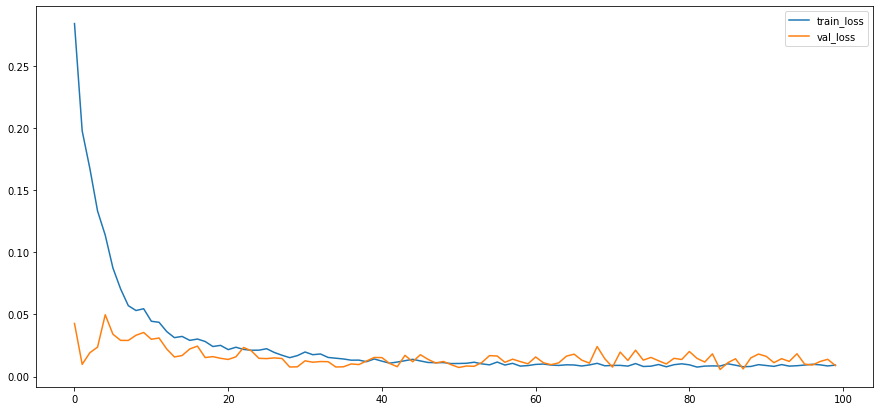

In [1510]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train_loss", "val_loss"])

#**TEST PREDICTIONS**

In [1570]:
model.load_weights(filepath)

descale = (max_-min_)+min_

predict_close = []
predict_close = np.reshape(model.predict(X_test) * descale, (1,-1))
predict_close = predict_close[0]
performance = pd.DataFrame([predict_close, y_test * descale])
performance = performance.T
performance.columns=['Predicted','Actual']
performance.tail()

,Predicted,Actual
85,5637.374512,8559.045160
86,5392.973145,8702.756478
87,5754.006836,8566.538885
88,5421.044922,8685.754740
89,4965.686035,NaN


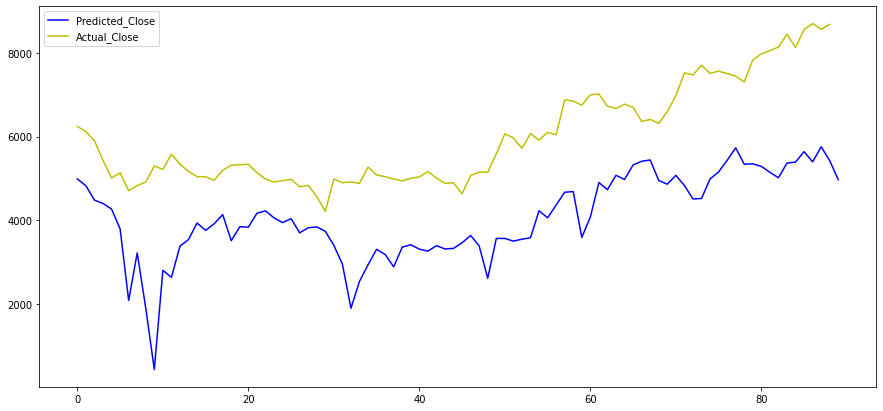

In [1571]:
plt.figure(figsize=(15,7))
plt.plot(performance.Predicted,c='b')
plt.plot(performance.Actual,c='y')
plt.legend(['Predicted_Close','Actual_Close'])
plt.show()

# **TEST SPREAD CHANNEL**

In [1601]:
ema_period = 25

predict_close = []
predict_close = np.reshape(model.predict(X_train[-ema_period:]) * descale, (1,-1))
predict_close = predict_close[0]
val_performance = pd.DataFrame([predict_close, y_train[-ema_period:] * descale])
val_performance = val_performance.T
val_performance.columns=['Predicted','Actual']

val_Spread = []
val_Spread = val_performance.Actual - val_performance.Predicted

val_Spread

0      440.075108
1     2538.030822
2     3001.939879
3     3807.314811
4     3655.197741
5     2426.200126
6     1820.449038
7     1455.601250
8     1574.836738
9     1541.387349
10    1354.836348
11    1346.104334
12    1329.971284
13    1618.920151
14    1610.316347
15     885.452778
16     965.095016
17    1648.373113
18    1035.605635
19    1366.052644
20    1555.530477
21    1578.063425
22    1227.210189
23    1576.225859
24    1949.049154
dtype: float64

In [1602]:
Spread

0     1257.798065
1     1295.606421
2     1421.743231
3     1033.293796
4      744.622186
         ...     
85    2921.670649
86    3309.783333
87    2812.532049
88    3264.709818
89            NaN
Length: 90, dtype: float64

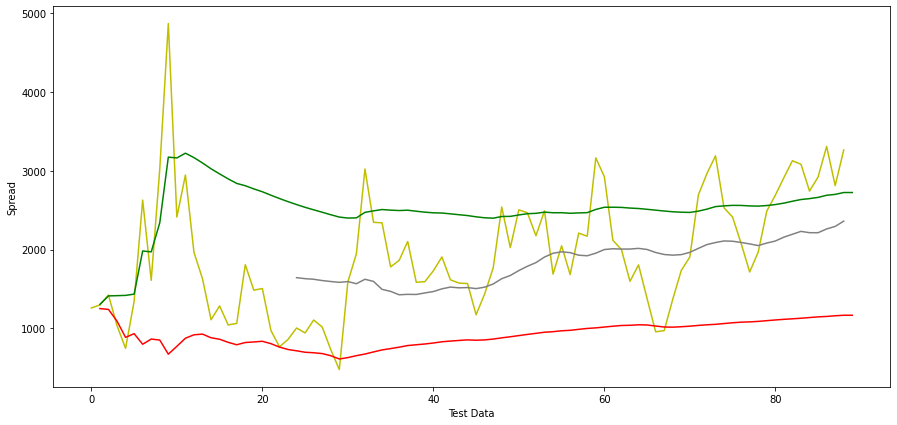

In [1627]:
Spread = []
Spread = performance.Actual - performance.Predicted

#Spread_plusCompleter = np.array([Spread, val_Spread])

#EMA = ta.SMA(pd.concat([val_Spread, Spread.shift(ema_period).dropna()], ), timeperiod=ema_period)

EMA = ta.SMA(Spread, timeperiod=ema_period)

s=1
plt.figure(figsize=(15,7))
plt.plot(Spread, c='y')
plt.plot(Spread.expanding().mean()+s*Spread.expanding().std(),c='g')
plt.plot(Spread.expanding().mean()-s*Spread.expanding().std(),c='r')
plt.plot(EMA, c='gray')
plt.ylabel('Spread')
plt.xlabel('Test Data')
plt.show()

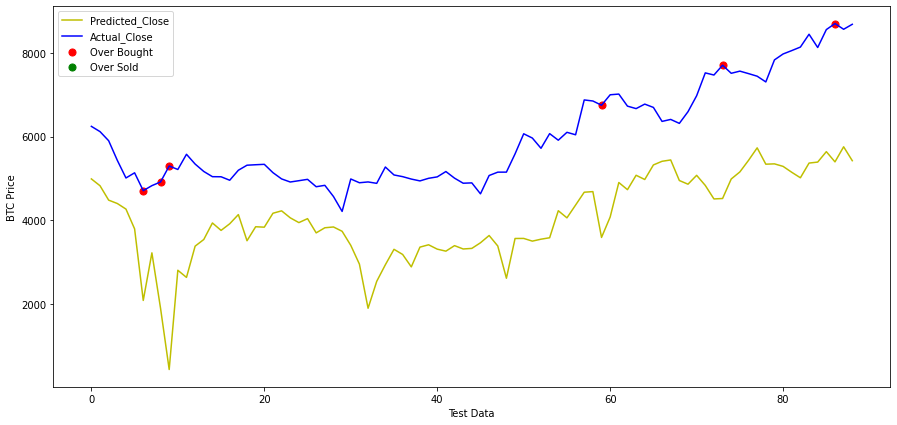

In [1514]:
plt.figure(figsize=(15,7))
# Plot the predicted and actual prices for comparison
plt.plot(performance.Predicted.iloc[:-1],c='y')
plt.plot(performance.Actual,c='b')
# Plot the sell signlas wherever the Spread is above the upper standard deviation band
plt.scatter(performance.Actual[(Spread>Spread.expanding().mean()+s*Spread.expanding().std())].index,
            performance.Actual[(Spread>Spread.expanding().mean()+s*Spread.expanding().std())],c='r',s=50)
# Plot the buy signlas wherever the Spread is below the lower standard deviation band
plt.scatter(performance.Actual[(Spread<Spread.expanding().mean()-s*Spread.expanding().std())].index,
            performance.Actual[(Spread<Spread.expanding().mean()-s*Spread.expanding().std())],c='g',s=50)
plt.legend(['Predicted_Close','Actual_Close','Over Bought','Over Sold'])
plt.ylabel('BTC Price')
plt.xlabel('Test Data')
plt.show()

#**MEASURE MODEL PERFORMANCE**

Market profit: 37.22%


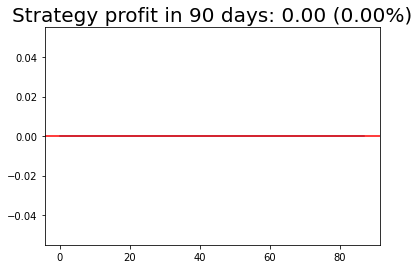

In [1515]:
# TEST FOR PROFIT

# TODO: This part of the cold is recycled from old code, so naming conventions must be matched

# If next predicted price is higher than actual price, buy.
# Otherwise, stay out of the market.

current_position = 0

sample = performance

for idx in range(0, performance.shape[0]-1):
  if sample.loc[idx, 'Actual'] < sample.loc[idx+1, 'Predicted']:
    current_position = 1
  else:
    current_position = 0  # Can also be -1 if we want to try a Long/Short strategy
  sample.loc[idx,'Position'] = current_position
  sample.loc[idx, 'Profit'] = current_position*(sample.loc[idx+1, 'Actual'] - sample.loc[idx, 'Actual'])

plt.title("Profit per day over history",fontsize=20)
sample['Wealth'] = sample['Profit'].cumsum()
sample.Wealth.plot()
plt.axhline(y=0, color='red')
plt.title("Strategy profit in {:.0f} days: {:.2f} ({:.2f}%)".format(
    len(sample.index),
    sample.loc[sample.index[-3], 'Wealth'],
    sample.loc[sample.index[-3], 'Wealth']/sample.loc[sample.index[0], 'Actual']*100),
    fontsize=20)

print("Market profit: {:.2f}%".format((sample.loc[sample.index[-3], 'Actual']/sample.loc[0, 'Actual']-1)*100))

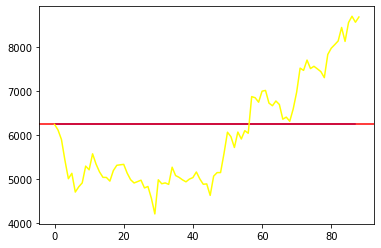

In [1516]:
# Visualize Model vs Market (Buy&Hold) side by side

sample['TotalWealth'] = sample['Wealth'] + sample.Actual[0]
sample.TotalWealth.plot(color="blue")
plt.axhline(y=sample.Actual[0], color='red')
sample.Actual.plot(color='yellow')

Market profit: 37.22%


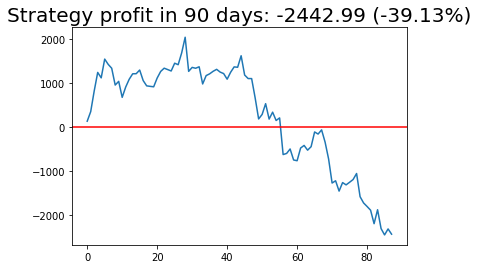

In [1517]:
# TEST FOR PROFIT CONSIDERING LONG-SHORT

current_position = 0

sample = performance

for idx in range(0, performance.shape[0]-1):
  if sample.loc[idx, 'Actual'] < sample.loc[idx+1, 'Predicted']:
    current_position = 1
  else:
    current_position = -1  # Can also be -1 if we want to try a Long/Short strategy
  sample.loc[idx,'Position'] = current_position
  sample.loc[idx, 'Profit'] = current_position*(sample.loc[idx+1, 'Actual'] - sample.loc[idx, 'Actual'])

plt.title("Profit per day over history",fontsize=20)
sample['Wealth'] = sample['Profit'].cumsum()
sample.Wealth.plot()
plt.axhline(y=0, color='red')
plt.title("Strategy profit in {:.0f} days: {:.2f} ({:.2f}%)".format(
    len(sample.index),
    sample.loc[sample.index[-3], 'Wealth'],
    sample.loc[sample.index[-3], 'Wealth']/sample.loc[sample.index[0], 'Actual']*100),
    fontsize=20)

print("Market profit: {:.2f}%".format((sample.loc[sample.index[-3], 'Actual']/sample.loc[0, 'Actual']-1)*100))

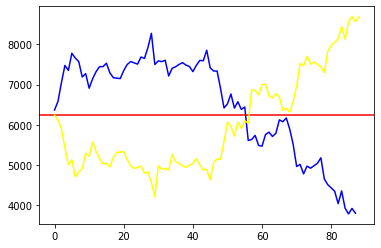

In [1518]:
# Visualize Model vs Market (Buy&Hold) side by side

sample['TotalWealth'] = sample['Wealth'] + sample.Actual[0]
sample.TotalWealth.plot(color="blue")
plt.axhline(y=sample.Actual[0], color='red')
sample.Actual.plot(color='yellow')

In [1519]:
(len(sample.loc[sample.Profit > 0])/len(sample))*100

48.888888888888886